In [1]:
from operator import add
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.stats import LombScargle
#from gatspy.periodic import LombScargleFast
from functools import partial
from gatspy import periodic
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from multiprocessing import Pool
import numpy as np
import os
#from sqlite3 import *
import random
from random import shuffle
from random import randint

In [2]:
#conn = connect('minion_1016_sqlite.db')
#conn = connect('astro_lsst_01_1004_sqlite.db')
#conn = connect('minion_1020_sqlite.db')

In [3]:
# LSST zero points  u,g,r,i,z,y
zeroPoints = [0,26.5,28.3,28.13,27.79,27.4,26.58]
FWHMeff = [0.8,0.92,0.87,0.83,0.80,0.78,0.76] # arcmins?
pixelScale = 0.2
readOut = 12.7
sigSys = 0.005
flareperiod = 4096
flarecycles = 10
dayinsec=86400
background = 40
# sat mag u,g,r,i,z,y=14.7,15.7,15.8,15.8,15.3 and 13.9
# start date 59580.033829 end date + 10 years
#maglist=[20]*7

lim = [0, 23.5, 24.8, 24.4, 23.9, 23.3, 22.1] # limiting magnitude ugry
sat = [0, 14.7, 15.7, 15.8, 15.8, 15.3, 13.9] # sat mag as above

In [4]:
looooops = 10
maglength = 4
freqlength = 4
processors = 4

In [5]:
#minion 1016
#obs = [[59616.299504000002, 59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59666.409095000003, 59666.410887999999, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59678.188327000003, 59679.188063000001, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59682.108, 59682.115618999997, 59688.361971999999, 59688.381748, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59701.081133, 59701.089132000001, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59720.039016000002, 59720.131756000002, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004, 59728.030495999999, 59728.033172000003, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59751.009136000001, 59752.999348999998, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59784.020849, 59784.196575000002, 59784.226672999997, 59785.116557000001, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59641.311065000002, 59641.312855999997, 59645.235432000001, 59645.250542000002, 59645.257657000002, 59670.201271999998, 59670.207947000003, 59670.212396000003, 59697.093621, 59697.098956000002, 59697.106963999999, 59697.122542999998, 59697.130999000001, 59700.108522000002, 59700.134785000002, 59700.136573999996, 59702.061070000003, 59702.065957999999, 59702.083315999997, 59703.062193999998, 59703.079078000002, 59703.136494999999, 59703.157184000003, 59703.164822999999, 59728.030495999999, 59728.033172000003, 59762.982685000003, 59762.998347000001, 59763.044794000001, 59785.116557000001], [59665.315978999999, 59665.317778999997, 59665.331387999999, 59665.338168000002, 59665.340858000003, 59665.347642000001, 59751.009136000001, 59752.999348999998, 59757.991382, 59758.000322, 59758.002114000003, 59758.007490000004, 59758.011968999999, 59758.016893, 59758.982513000003, 59761.330683, 59761.337788999997, 59761.348432999999, 59781.102318999998, 59781.108595999998, 59781.110858, 59781.115806000002, 59781.181435999999, 59781.191747999997, 59781.224978999999, 59786.007049, 59786.015151, 59786.028699000002, 59786.043646999999, 59786.209666000002], [59695.111334000001, 59695.115773999998, 59695.153166999997, 59695.159857999999, 59695.168356000002, 59695.172381999997, 59701.081133, 59701.089132000001, 59720.039016000002, 59720.131756000002, 59750.009051000001, 59750.016649999998, 59750.01844, 59750.133191000001, 59750.138593999996, 59750.151811999996, 59750.189723000003, 59750.196898000002, 59750.255781, 59757.169065000002, 59757.172694000001, 59757.180769999999, 59757.194269, 59777.060711999999, 59777.091758000002, 59777.097652999997, 59777.14069, 59784.020849, 59784.196575000002, 59784.226672999997], [59616.299504000002, 59674.227401999997, 59674.235911999996, 59674.236807000001, 59676.152357999999, 59676.160802999999, 59676.175913999999, 59680.131445999999, 59680.133674999997, 59680.139883000003, 59680.150558000001, 59680.171031999998, 59680.178599999999, 59693.083102999997, 59693.095993000003, 59693.104443999997, 59696.068472999999, 59696.091596999999, 59696.097387000002, 59696.106288000003, 59696.136084999998, 59698.07746, 59698.085009000002, 59698.100560999999, 59698.152201999997, 59728.989365000001, 59729.002269999997, 59729.009832000003, 59729.010720999999, 59748.116349999997], [59656.269638999998, 59656.276618000004, 59657.197829999997, 59657.205827999998, 59657.215175999998, 59657.263699000003, 59678.188327000003, 59679.188063000001, 59688.361971999999, 59688.381748, 59704.095727, 59704.168875000003, 59705.400307000004, 59718.252451, 59718.275501999997, 59718.279098999999, 59718.324256, 59722.020894000001, 59722.038672000002, 59724.016089999997, 59724.026761000001, 59724.114585000003, 59725.013185000003, 59725.021194000001, 59725.029653999998, 59725.034094000002, 59725.041222, 59725.994381999997, 59725.998256999999, 59727.988340000004], [59616.373899999999, 59617.377407, 59618.304701000001, 59618.320704999998, 59618.327817999998, 59618.367501000001, 59618.372427000002, 59618.377794, 59618.385405000001, 59620.357216999997, 59620.363462000001, 59620.379584000002, 59620.389000000003, 59621.297327, 59621.305326000002, 59621.314226000002, 59622.312717000001, 59622.366688000002, 59630.275236000001, 59630.286805999996, 59630.303731, 59652.303389000001, 59652.304282999998, 59653.269506999997, 59653.275774000002, 59654.265184999997, 59666.409095000003, 59666.410887999999, 59682.108, 59682.115618999997]]

In [6]:
# astro
obs = [[59669.401036000003, 59669.415071000003, 59675.397819999998, 59677.415775000001, 59680.223431999999, 59680.237016999999, 59680.393256000003, 59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59691.311783999998, 59691.326623000001, 59697.201801000003, 59697.226375999999, 59704.123689, 59704.137447000001, 59713.211079000001, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 59729.068837999999, 59729.093142999998, 59751.027583000003, 59751.049007000001, 59757.138006000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59777.082416999998, 59777.102072000001, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 59791.009824000001, 59801.005361000003, 59801.073385999996, 59809.074531999999, 59809.086860000003, 59818.017253999999, 59830.021194000001, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60023.375708, 60027.276451999998, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60036.318089, 60036.346084999997, 60037.228949999997, 60037.233992000001, 60037.373957000003, 60037.394174000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60050.276508000003, 60050.298390000004, 60051.194966000003, 60055.180418999997, 60055.200091999999, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60066.164306999999, 60066.184649000003, 60070.175371999998, 60070.187576999997, 60077.210695000002, 60077.226862000003, 60080.142302, 60091.154763999999, 60091.176958999997, 60096.061420999999, 60096.078866999997, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60128.986486000002, 60129.092213999997, 60130.968904000001, 60131.001272000001, 60138.072592999997, 60138.089612999996, 60138.958729999998, 60138.970401999999, 60142.029265999998, 60142.043682000003, 60162.143162, 60162.163673000003, 60166.118167000001, 60166.127850999997, 60169.057130000001, 60179.031756999997, 60179.044825999998, 60184.074436000003, 60184.088114999999, 60196.034555999999, 60200.038926000001, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61116.299725999997, 61116.309694000003, 61117.308653, 61117.331833999997, 61121.261482000002, 61121.276405999997, 61122.247755999997, 61122.270722000001, 61125.246002, 61125.258173000002, 61146.195286000002, 61146.204263, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61168.343100999999, 61168.360527999997, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61194.299290000003, 61198.183609, 61198.202326999999, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61222.212052000003, 61222.235246999997, 61223.976030999998, 61223.99267, 61225.270942000003, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61234.024741000001, 61242.011206000003, 61242.027925000002, 61250.978001000003, 61251.001197999998, 61263.049292000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61308.049478000001, 61314.024559999998, 61314.040779000003, 61457.371571000003, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61468.329055000002, 61468.349443999999, 61472.339615999997, 61473.297693, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61482.353294, 61482.369771999998, 61485.302841999997, 61487.28716, 61498.254727, 61500.234777999998, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61515.222293999999, 61515.242032000002, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61524.316500000001, 61524.334358, 61526.143040000003, 61526.158313, 61529.144471, 61529.153075000002, 61535.190121, 61535.203748, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61551.275856, 61551.291928999999, 61553.077337000002, 61553.094985999996, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61576.204814999997, 61576.223758, 61579.021372000003, 61579.035147000002, 61579.178869000003, 61579.194248, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61587.991277000001, 61594.974951999997, 61594.993855000001, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61818.385349999997, 61823.371563000001, 61825.345780000003, 61825.358432000001, 61831.360010999997, 61831.377608000003, 61836.370679, 61836.386992, 61837.319846999999, 61837.333532999997, 61840.293000999998, 61840.310907999999, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61853.273294999999, 61853.294459999997, 61855.264411999997, 61855.281715999998, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61880.202315000002, 61880.220170000001, 61883.302288999999, 61884.188242999997, 61884.20768, 61888.161372000002, 61888.172133, 61888.177112999998, 61890.193804000002, 61890.219878000004, 61891.176502000002, 61891.190996999998, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 61911.101354999999, 61911.121593999997, 61919.065248999999, 61919.082111999996, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61944.009872000002, 61944.023482999997, 61975.970884000002, 61977.961220999998, 61990.022662000003, 61990.033308999999, 61990.969071, 61991.008371999997, 62014.081587000001, 62029.983668000001, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62181.374238999997, 62182.367337999996, 62183.360256, 62186.365560999999, 62186.379598, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62204.338451000003, 62204.365867, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62212.274963000003, 62212.287948999998, 62213.285864999998, 62213.306700000001, 62219.256890999997, 62219.267795, 62223.241082, 62223.246038999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62235.210424999997, 62235.228042000002, 62236.20822, 62238.248929000001, 62238.268077000001, 62241.211341000002, 62241.218096999997, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62248.194274000001, 62248.204657000002, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62268.122880000003, 62268.129644000001, 62272.098738000001, 62272.110978999997, 62280.088317000002, 62280.107866999999, 62283.160799999998, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62310.012877000001, 62314.054224, 62323.028632000001, 62323.048261000004, 62323.988273000003, 62324.003357000001, 62324.955743999999, 62345.012896, 62350.057391000002, 62350.075546, 62350.996397000003, 62351.013322999999, 62354.984272000002, 62355.989008999997, 62362.084443, 62362.111626999998, 62370.008264999997, 62370.026551000003, 62391.000625000001, 62391.017884000001, 62399.080485999999, 62547.357983000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62550.391247, 62552.342559999997, 62552.35871, 62553.376311, 62553.392919999998, 62555.367782000001, 62562.328599, 62563.314242, 62563.325872000001, 62564.311908000003, 62564.332610999998, 62565.378089999998, 62566.307476000002, 62572.319470000002, 62572.334019000002, 62579.283603999997, 62579.289083999996, 62579.304375, 62583.363942999997, 62583.386175, 62593.229937999997, 62594.234393999999, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62606.214210999999, 62606.232379000001, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62614.276168999997, 62614.289700000001, 62614.40524, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62617.184884000002, 62617.201126, 62619.158406000002, 62619.172734, 62625.132279999998, 62625.149214999998, 62628.238909, 62628.262873, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62679.019597999999, 62679.035258000004, 62680.994428999998, 62680.998517, 62682.975467999997, 62682.993563999997, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62710.021248999998, 62725.122134999998, 62739.000661999999, 62739.020772999997, 62746.071468000002, 62746.091383999999, 62767.044696999998, 62767.057416000003, 62786.989026000003, 62787.012288999998, 62907.389675999999, 62910.355684000002, 62917.357602999997, 62918.341564000002, 62918.361992999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62926.395677, 62929.382726000003, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62942.289886999999, 62942.307116000004, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62948.267722999997, 62948.283458999998, 62950.266599000002, 62952.263092000001, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 62964.286281000001, 62964.306131999998, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63008.082414999997, 63008.096201, 63013.110240000002, 63013.130654000001, 63019.096136, 63020.122412999997, 63021.055490999999, 63033.026432999999, 63033.030551000003, 63043.991292999999, 63044.008430000002, 63047.046110000003, 63047.063009999998, 63051.185763000001, 63052.153337000003, 63052.174461000002, 63067.027063000001, 63067.049218, 63075.972807999999, 63079.058826, 63081.140289000003, 63081.159926, 63083.087984999998, 63083.115440000001, 63093.993697999998, 63108.068511999998, 63113.043817999998, 63117.002920999999, 63117.024508000002, 63123.996573999997], [59757.138006000001, 59791.009824000001, 59818.017253999999, 60027.276451999998, 60051.194966000003, 60080.142302, 60169.057130000001, 60200.038926000001, 61116.299725999997, 61116.309694000003, 61146.195286000002, 61146.204263, 61234.024741000001, 61263.049292000003, 61472.339615999997, 61473.297693, 61498.254727, 61500.234777999998, 61529.144471, 61529.153075000002, 61587.991277000001, 61823.371563000001, 61883.302288999999, 61888.161372000002, 61888.172133, 61888.177112999998, 62181.374238999997, 62183.360256, 62236.20822, 62241.211341000002, 62241.218096999997, 62268.122880000003, 62268.129644000001, 62355.989008999997, 62562.328599, 62566.307476000002, 62593.229937999997, 62594.234393999999, 62680.994428999998, 62680.998517, 62710.021248999998, 62917.357602999997, 62950.266599000002, 62952.263092000001, 63033.026432999999, 63033.030551000003, 63093.993697999998], [59697.201801000003, 59697.226375999999, 59751.027583000003, 59751.049007000001, 60050.276508000003, 60050.298390000004, 60077.210695000002, 60077.226862000003, 60142.029265999998, 60142.043682000003, 60196.034555999999, 61223.976030999998, 61223.99267, 61225.982183, 61225.997861000003, 61226.013913000003, 61226.033589999999, 61314.024559999998, 61314.040779000003, 61501.223613000002, 61501.242009000001, 61501.258134000003, 61501.271148, 61535.190121, 61535.203748, 61553.077337000002, 61553.094985999996, 61825.345780000003, 61825.358432000001, 61855.264411999997, 61855.281715999998, 61880.202315000002, 61880.220170000001, 61884.188242999997, 61884.20768, 61919.065248999999, 61919.082111999996, 62208.323991999998, 62208.337879999999, 62209.288247999997, 62209.298486, 62235.210424999997, 62235.228042000002, 62272.098738000001, 62272.110978999997, 62362.084443, 62362.111626999998, 62564.311908000003, 62564.332610999998, 62596.220564000003, 62596.235083, 62597.221890000001, 62597.240213999998, 62625.132279999998, 62625.149214999998, 62739.000661999999, 62739.020772999997, 62948.267722999997, 62948.283458999998, 62974.193093000002, 62974.212836999999, 62975.191464000003, 62975.207611999998, 63117.002920999999, 63117.024508000002], [59675.397819999998, 59704.123689, 59704.137447000001, 59729.068837999999, 59729.093142999998, 59786.070033999997, 59786.090433999998, 59786.097306000003, 59786.109027999999, 60023.375708, 60028.288193, 60028.308090999999, 60030.314381999997, 60030.328269999998, 60055.180418999997, 60055.200091999999, 60119.177481999999, 60119.194690999997, 60121.152529999999, 60121.172029000001, 60122.027545999998, 60122.043795999998, 60162.143162, 60162.163673000003, 61114.360412000002, 61114.378301999997, 61115.286507999997, 61115.304865999999, 61121.261482000002, 61121.276405999997, 61125.246002, 61125.258173000002, 61169.222824999997, 61169.234147000003, 61169.274084999997, 61169.299653000002, 61169.327989999998, 61169.348382999997, 61198.183609, 61198.202326999999, 61242.011206000003, 61242.027925000002, 61475.314823000001, 61475.338272000001, 61477.293532000003, 61477.311663, 61480.271501000003, 61480.289167000003, 61524.316500000001, 61524.334358, 61553.233786999997, 61553.253231000002, 61553.257812999997, 61553.278839999999, 61579.021372000003, 61579.035147000002, 61581.984509000002, 61582.004709000001, 61582.009180000001, 61582.031156999998, 61582.102685999998, 61582.128579999997, 61584.982215000004, 61585.007533999997, 61831.360010999997, 61831.377608000003, 61837.319846999999, 61837.333532999997, 61849.298828999999, 61849.321584999998, 61849.366812, 61849.385729000001, 61853.273294999999, 61853.294459999997, 61891.176502000002, 61891.190996999998, 61908.186879000001, 61908.204249000002, 61909.111512000003, 61909.126201999999, 61909.139291, 61909.161033999997, 62182.367337999996, 62186.365560999999, 62186.379598, 62204.338451000003, 62204.365867, 62213.285864999998, 62213.306700000001, 62242.209183999999, 62242.219472999997, 62242.237584000002, 62242.253171999997, 62244.225061999998, 62244.237959999999, 62247.216048000002, 62247.231201000002, 62306.062433999999, 62306.081048, 62306.085662999998, 62306.108797000001, 62323.988273000003, 62324.003357000001, 62345.012896, 62350.996397000003, 62351.013322999999, 62547.357983000002, 62563.314242, 62563.325872000001, 62565.378089999998, 62598.244789999997, 62598.271589000004, 62601.215307999999, 62601.230505, 62615.192768000001, 62615.214276999999, 62615.237509999999, 62615.261590000002, 62619.158406000002, 62619.172734, 62644.126301999997, 62644.138222000001, 62645.104292999997, 62645.127547999997, 62651.088185000001, 62651.102419000003, 62679.019597999999, 62679.035258000004, 62767.044696999998, 62767.057416000003, 62918.341564000002, 62918.361992999999, 62942.289886999999, 62942.307116000004, 62970.216094000003, 62970.229289000003, 62970.237544000003, 62970.254657999998, 62970.278386999998, 62970.295687999998, 62971.200882999998, 62971.221944999998, 63013.110240000002, 63013.130654000001, 63043.991292999999, 63044.008430000002, 63113.043817999998], [59680.223431999999, 59680.237016999999, 59680.393256000003, 59691.311783999998, 59691.326623000001, 59777.082416999998, 59777.102072000001, 59809.074531999999, 59809.086860000003, 60036.318089, 60036.346084999997, 60037.373957000003, 60037.394174000001, 60057.197643, 60057.216825000003, 60063.178166999998, 60063.193485000003, 60091.154763999999, 60091.176958999997, 60138.072592999997, 60138.089612999996, 60166.118167000001, 60166.127850999997, 60179.031756999997, 60179.044825999998, 61117.308653, 61117.331833999997, 61122.247755999997, 61122.270722000001, 61152.169632999998, 61152.187408999998, 61152.196831000001, 61152.215136999999, 61154.158039000002, 61154.177694999998, 61155.167309999997, 61155.186038, 61168.343100999999, 61168.360527999997, 61225.270942000003, 61468.329055000002, 61468.349443999999, 61482.353294, 61482.369771999998, 61510.195647, 61510.208694000001, 61510.295080000004, 61510.309720999998, 61522.286763999997, 61522.303873999997, 61522.314851000003, 61522.327489000003, 61522.334698999999, 61522.357401000001, 61523.159546000003, 61523.173132000004, 61526.143040000003, 61526.158313, 61551.275856, 61551.291928999999, 61579.178869000003, 61579.194248, 61836.370679, 61836.386992, 61850.270688999997, 61850.285108999997, 61850.311497000002, 61850.333305, 61850.390772999999, 61876.270036000002, 61876.289112999999, 61876.299217, 61876.310130999998, 61890.193804000002, 61890.219878000004, 61911.101354999999, 61911.121593999997, 61944.009872000002, 61944.023482999997, 61990.022662000003, 61990.033308999999, 62205.292288999997, 62205.307386, 62205.321723000001, 62205.339640999999, 62212.274963000003, 62212.287948999998, 62219.256890999997, 62219.267795, 62238.248929000001, 62238.268077000001, 62248.194274000001, 62248.204657000002, 62259.151827000002, 62259.167149000001, 62259.172633000002, 62259.183327999999, 62259.191350000001, 62259.204812000004, 62323.028632000001, 62323.048261000004, 62350.057391000002, 62350.075546, 62391.000625000001, 62391.017884000001, 62572.319470000002, 62572.334019000002, 62614.276168999997, 62614.289700000001, 62614.40524, 62617.184884000002, 62617.201126, 62628.238909, 62628.262873, 62655.180737000002, 62655.203766999999, 62655.215711999997, 62655.230992999997, 62678.069217999997, 62678.085948, 62678.108873999998, 62678.125568000003, 62682.975467999997, 62682.993563999997, 62746.071468000002, 62746.091383999999, 62921.334889999998, 62921.355549, 62924.371144999997, 62929.382726000003, 62945.286585000002, 62945.302958, 62946.261257999999, 62946.279375999999, 62978.173988000002, 62978.184294999999, 62982.161947000001, 62982.177073999999, 62984.183287, 62984.201694000003, 63008.082414999997, 63008.096201, 63067.027063000001, 63067.049218, 63083.087984999998, 63083.115440000001], [59669.401036000003, 59669.415071000003, 59677.415775000001, 59686.300793000002, 59686.318339999998, 59686.330581000002, 59686.345019, 59688.417806999998, 59718.200410999998, 59718.224856000001, 59718.230648999997, 59718.252210999999, 59718.358633999997, 59718.37169, 59718.395214999997, 59718.407872000003, 60004.391853000001, 60010.366083000001, 60010.387742999999, 60013.374365000003, 60013.393918000002, 60066.164306999999, 60066.184649000003, 60096.061420999999, 60096.078866999997, 60130.968904000001, 60131.001272000001, 60138.958729999998, 60138.970401999999, 60184.074436000003, 60184.088114999999, 61186.133314999999, 61186.148413000003, 61187.132354000001, 61187.145227000001, 61189.075984000003, 61222.212052000003, 61222.235246999997, 61250.978001000003, 61251.001197999998, 61281.07847, 61281.099573, 61306.024118000001, 61306.044666000002, 61458.338565999999, 61458.353643000002, 61458.370476999997, 61458.384679000003, 61461.378098000001, 61461.398512, 61515.222293999999, 61515.242032000002, 61576.204814999997, 61576.223758, 61594.974951999997, 61594.993855000001, 61818.385349999997, 61842.402012999999, 61843.354002, 61843.367603999999, 61843.399298999997, 61867.214832999998, 61867.227121000004, 61867.253166000002, 61867.272170999997, 61925.105426000002, 61925.128547, 61926.150692000003, 61926.160682000002, 61927.124170000003, 61927.141666000003, 61990.969071, 61991.008371999997, 62049.995663000002, 62050.011637000003, 62053.996730999999, 62198.347633999998, 62198.364235000001, 62198.385893999999, 62198.400805999998, 62226.338368999997, 62226.358560000001, 62227.325559999997, 62227.339432000001, 62228.239337999999, 62228.253972999999, 62280.088317000002, 62280.107866999999, 62286.131667000001, 62286.149421000002, 62286.206214999998, 62286.223382999997, 62324.955743999999, 62370.008264999997, 62370.026551000003, 62399.080485999999, 62550.391247, 62553.376311, 62553.392919999998, 62583.363942999997, 62583.386175, 62606.214210999999, 62606.232379000001, 62630.116813000001, 62637.198951999999, 62637.217517999998, 62699.015419000003, 62699.028081999997, 62702.961589999999, 62702.975097000002, 62786.989026000003, 62787.012288999998, 62926.395677, 62935.301229999997, 62935.324794, 62936.334968000003, 62936.361724000002, 62964.286281000001, 62964.306131999998, 62988.166173999998, 62988.182500000003, 62990.144530999998, 62990.154106000002, 63047.046110000003, 63047.063009999998, 63052.153337000003, 63052.174461000002, 63081.140289000003, 63081.159926, 63123.996573999997], [59683.295665999998, 59683.321671999998, 59683.323508000001, 59685.190992000003, 59685.194561999997, 59685.205355999999, 59685.296957999999, 59713.211079000001, 59769.953996999997, 59769.9594, 59769.965235000003, 59769.971061999997, 59801.005361000003, 59801.073385999996, 59830.021194000001, 60036.217178999999, 60036.222633999998, 60036.230925000003, 60037.228949999997, 60037.233992000001, 60038.218720999997, 60040.209766, 60040.244417000002, 60042.223886, 60070.175371999998, 60070.187576999997, 60128.986486000002, 60129.092213999997, 61160.155308000001, 61160.165632999997, 61162.202474999998, 61194.299290000003, 61221.991934999998, 61222.002692000002, 61222.008972000003, 61276.095731000001, 61276.999729000003, 61277.022233000003, 61308.049478000001, 61457.371571000003, 61485.302841999997, 61487.28716, 61512.192888999998, 61512.204087999999, 61514.185146000003, 61514.215648999998, 61541.125100999998, 61541.128262999999, 61542.128701000001, 61543.126642000003, 61595.967822999999, 61607.968979999998, 61620.982320000003, 61624.978393999998, 61631.060151999998, 61812.369018999998, 61812.372172000003, 61813.38493, 61813.390756000001, 61840.293000999998, 61840.310907999999, 61895.147465000002, 61895.148824999997, 61895.155115000001, 61896.128467000002, 61898.132425999996, 61898.156186, 61899.156008999998, 61975.970884000002, 61977.961220999998, 62014.081587000001, 62029.983668000001, 62192.316816999999, 62193.345355999998, 62194.342861999998, 62196.357411999998, 62200.310945999998, 62200.336392999998, 62200.343104, 62200.345803999997, 62223.241082, 62223.246038999998, 62251.157003, 62252.166957000001, 62254.182165999999, 62254.187537999998, 62283.160799999998, 62310.012877000001, 62314.054224, 62354.984272000002, 62548.355286999998, 62549.347605000003, 62549.374601000003, 62549.380873000002, 62552.342559999997, 62552.35871, 62555.367782000001, 62579.283603999997, 62579.289083999996, 62579.304375, 62607.183992999999, 62607.205892999998, 62608.188769, 62608.208103999998, 62609.193136000002, 62609.212382999998, 62725.122134999998, 62907.389675999999, 62910.355684000002, 62931.294734000003, 62931.341457000002, 62933.296303000003, 62933.305694000002, 62933.312453999999, 62961.223678000002, 62961.229058999998, 62961.231755000001, 62963.212475, 62963.217839999998, 63019.096136, 63020.122412999997, 63021.055490999999, 63051.185763000001, 63075.972807999999, 63079.058826, 63108.068511999998]]

In [7]:
#panstars -25%
#obs = [[60531.071223999999, 60531.095079999999, 60533.979278999999, 60534.001171000004, 60549.090257999997, 60549.114908000003, 60554.062473999998, 60561.061331999997, 60561.075468000003, 60567.039901999997, 60581.047275999998, 60584.012172000002, 60584.030354000002, 60595.998240000001, 60717.364999999998, 60719.357770000002, 60719.370206, 60719.374258000003, 60719.389403000001, 60721.355770000002, 60721.370198999997, 60724.388738000001, 60734.308327999999, 60734.330119999999, 60749.292985, 60749.30687, 60757.327615000002, 60757.350493999998, 60759.331703000003, 60759.354592000003, 60761.249121000001, 60761.261348, 60764.241440999998, 60767.226919000001, 60767.249642000002, 60768.225974000001, 60768.249887999998, 60771.315562999996, 60771.333556999998, 60777.207246999998, 60778.300637, 60785.176995000002, 60785.194191000002, 60785.357668999997, 60785.382737, 60792.187410999999, 60792.205090000003, 60799.141971999998, 60799.162410999998, 60801.140652000002, 60801.164489000003, 60804.124882999997, 60804.131156000003, 60804.145357000001, 60805.151169999997, 60805.172936000003, 60808.157016999998, 60808.163726999999, 60814.209052999999, 60814.233469999999, 60814.240855999997, 60819.135339, 60824.096416, 60824.114462999998, 60824.131432000002, 60824.149073, 60827.108712000001, 60827.125158000003, 60841.166593000002, 60841.182779000002, 60844.007633000001, 60844.025068000003, 60850.062225000001, 60859.012755000003, 60860.985685, 60861.005015000002, 60869.014272, 60869.036116000003, 60869.957109000003, 60869.965710999997, 60878.961877000002, 60881.029379, 60881.050684000002, 60895.108322, 60895.122017000002, 60896.108672000002, 60898.074535, 60907.98603, 60912.016964000002, 60912.033264999998, 60936.038804000003, 60936.054274000002, 60961.008841000003, 61088.342085999997, 61088.360870999997, 61099.321254000002, 61099.336401, 61100.313461999998, 61107.303480000002, 61107.363440000001, 61112.379070000003, 61112.401372, 61113.318936999996, 61113.338772000003, 61114.345203999997, 61114.365180000001, 61115.288374999996, 61115.294493000001, 61116.281644000002, 61124.252015999999, 61124.271268999997, 61125.265663999999, 61125.283817000003, 61129.234766000001, 61129.251459999999, 61129.263534999998, 61129.274029, 61130.365533999997, 61130.366431000002, 61132.276646999999, 61132.291781, 61133.274060000003, 61134.221530000003, 61134.225099000003, 61134.249322000003, 61140.210233999998, 61140.223886, 61140.232902000003, 61140.256828999998, 61147.199522000003, 61147.220840000002, 61151.179867999999, 61151.194931999999, 61158.162232000002, 61161.155206000003, 61170.141321000003, 61170.164608999999, 61174.155984999998, 61175.103981, 61175.128393999999, 61176.182220000002, 61176.205114999997, 61177.108724999998, 61182.090581999997, 61182.110487999998, 61185.084474000003, 61185.103667000003, 61194.154821999997, 61194.220992000002, 61194.243397999999, 61194.289395, 61194.294797000002, 61194.298410000003, 61194.302926999997, 61197.04279, 61197.060989999998, 61230.979839, 61230.992401000003, 61235.957347000003, 61250.134617999996, 61250.154973999997, 61254.079607, 61254.090964000003, 61258.0, 61258.014738999998, 61266.978034, 61280.079532999996, 61280.097633999998, 61316.020504, 61316.035329999999, 61446.366876, 61449.371760000002, 61456.345989000001, 61458.346959000002, 61459.363799999999, 61459.390060999998, 61469.307926000001, 61469.322574999998, 61471.352553999997, 61471.368993999997, 61472.329748999997, 61473.289203, 61473.306936000001, 61475.291948999999, 61481.301639999998, 61481.315465, 61487.257897000003, 61488.252594999998, 61488.277031999998, 61499.264050999998, 61499.284096000003, 61503.282532999998, 61503.309709000001, 61504.207708000002, 61504.220587000003, 61505.219276999997, 61505.239024000002, 61512.228975999999, 61512.245139999999, 61514.254010999997, 61514.267682999998, 61522.363396000001, 61522.384125999997, 61523.183987999997, 61523.199098999998, 61527.221621999997, 61527.240463000002, 61529.246777, 61532.172067, 61533.129443999998, 61533.146440999997, 61535.145948999998, 61535.163550999998, 61536.126457999999, 61536.143193999997, 61536.161982999998, 61536.175188000001, 61541.109556000003, 61541.126884999998, 61542.135014, 61543.110280000001, 61551.103313, 61555.075080000002, 61557.063988000002, 61557.088915, 61563.092744000001, 61563.105062000002, 61576.202195999998, 61576.223797999999, 61578.996297999998, 61579.006590999998, 61581.077925999998, 61581.093728, 61588.983660999998, 61594.961233000002, 61605.148110000002, 61605.165678999998, 61608.200339000003, 61624.973596999997, 61625.032351000002, 61625.051819, 61688.016448000002, 61691.004607000003, 61812.372500999998, 61812.384150999998, 61813.385126000001, 61815.364696999997, 61815.374559999997, 61824.341804000003, 61824.342699000001, 61826.360739999996, 61826.377111000002, 61827.326653999997, 61827.340186000001, 61839.295822, 61844.379805999997, 61844.391126000002, 61845.362000000001, 61845.373205999997, 61856.253448000003, 61856.269813999999, 61858.295508000003, 61858.313686000001, 61861.232666000004, 61861.250394000002, 61861.267205999997, 61861.280965999998, 61864.247327999998, 61864.263847000002, 61865.273848999997, 61865.291876000003, 61867.217195999998, 61867.232456999998, 61876.234060000003, 61876.244376000002, 61876.291111999999, 61876.311017, 61882.174722000003, 61882.203585000003, 61883.196818999997, 61883.214487999998, 61884.162343000004, 61884.178098999997, 61885.191570000003, 61885.196494999997, 61886.170180000001, 61894.146601, 61896.178367, 61896.200249000001, 61925.067869999999, 61925.086384000002, 61944.017370000001, 61946.022638000002, 61946.044637999999, 61949.993728000001, 61950.011333000002, 61959.057214, 61960.976057, 61965.023454000002, 61965.040538000001, 61987.062718000001, 61987.076458000003, 61992.042049999996, 61992.059851999999, 61992.968823000003, 61996.973036000003, 62013.007730999998, 62024.077092, 62024.087919999998, 62041.993039000001, 62042.013602999999, 62044.987995000003, 62046.021560000001, 62183.362540000002, 62185.352738000001, 62185.374299000003, 62188.360596999999, 62190.363782, 62190.378342999997, 62194.334572, 62194.347225999998, 62204.307132000002, 62204.319191000002, 62204.343693000003, 62204.360582000001, 62207.300454999997, 62207.318271999997, 62209.308169999997, 62209.325584999999, 62213.275697999998, 62213.287449000003, 62215.294646000002, 62215.311669000002, 62218.373806000003, 62218.394324000001, 62221.306251000002, 62222.311477000003, 62228.227420000003, 62228.228782999999, 62231.239844999996, 62231.248825000002, 62231.415091000003, 62233.225194999999, 62233.239980999999, 62234.211625999997, 62234.230930999998, 62236.206518999999, 62236.218261000002, 62238.197284000002, 62238.221004999999, 62244.188528999999, 62244.209417999999, 62247.173418999999, 62247.180118999997, 62247.196042000003, 62247.211342000002, 62247.231827000003, 62251.169555, 62251.184431000001, 62252.177996999999, 62252.184267999997, 62253.219159, 62253.234148000003, 62268.187871000002, 62278.085577999998, 62279.077907999999, 62280.087369000001, 62280.103014, 62282.124248, 62282.143973999999, 62283.113984000003, 62283.140103999998, 62302.031815000002, 62302.055514, 62303.067064000003, 62313.077679000002, 62313.078579000001, 62314.069149000003, 62314.083605, 62323.984808000001, 62324.000779000002, 62327.987742999998, 62328.013256999999, 62329.979490999998, 62329.994860999999, 62345.044233000001, 62345.063388000002, 62345.133799000003, 62345.145420000001, 62353.990276999997, 62354.015137000002, 62356.048727000001, 62370.047284, 62380.060383000004, 62380.080542000003, 62399.997772000002, 62409.988807000002, 62410.003727000003, 62411.019049000002, 62411.033998999999, 62548.353149000002, 62549.351925000003, 62549.352821, 62550.338731000003, 62554.357047999998, 62554.374899000002, 62559.346041999997, 62559.367589000001, 62560.350765000003, 62560.372723, 62563.335707999999, 62569.297490999998, 62569.318818, 62579.265053000003, 62579.278439000002, 62581.301569000003, 62590.414386999997, 62594.268376, 62596.228092999998, 62600.211509000001, 62600.231246000003, 62601.231922999999, 62601.246382999998, 62602.265405999999, 62602.287587999999, 62605.270337000002, 62605.287970999998, 62608.202235999997, 62608.210339999998, 62609.188368000003, 62614.316994000001, 62614.341149, 62615.196659000001, 62615.208021999999, 62618.203171000001, 62618.224015, 62623.148259000001, 62628.158691999997, 62628.172320999998, 62633.204453999999, 62633.225876999997, 62637.108541000001, 62637.128126000003, 62638.106694000002, 62638.124636, 62638.154676999999, 62638.168131999999, 62642.093461999997, 62642.105212000002, 62643.299017999998, 62643.319188000001, 62649.121361999998, 62649.136135000001, 62651.08685, 62658.097902000001, 62658.125116000003, 62677.008618, 62677.022631, 62682.095300000001, 62682.113695, 62682.986534999996, 62683.000071000002, 62686.987518000002, 62687.003679000001, 62723.982123000002, 62734.003728999996, 62734.025412000003, 62740.029483999999, 62753.024490999996, 62757.037273000002, 62757.053905000001, 62763.991307999997, 62764.003832000002, 62764.018014000001, 62910.359576000003, 62919.341489999999, 62919.363673, 62922.317579000002, 62922.334885999997, 62927.312448999997, 62927.331895000003, 62929.302252000001, 62929.317740999999, 62937.292170000001, 62937.327287, 62942.306501999999, 62942.326364, 62945.271992000002, 62948.245509, 62948.260319000001, 62949.262463999999, 62949.275207999999, 62954.260115999998, 62954.275726, 62958.240189999997, 62958.260559000002, 62958.270053, 62963.257336000002, 62965.249742, 62967.253069999999, 62967.268472000003, 62973.229717000002, 62973.250864000001, 62974.192321000002, 62975.202444000002, 62975.220673000003, 62976.186515000001, 62976.205663000001, 62977.209280000003, 62982.197173, 62982.218495000001, 62989.193424999998, 62989.207871999999, 62993.281573, 62999.109559999997, 62999.134471999998, 63001.149514999997, 63001.172651000001, 63005.118860000002, 63017.090090999998, 63017.102700000003, 63018.078399999999, 63018.097664000001, 63042.989474000002, 63044.985474000001, 63045.000634999997, 63045.988802, 63045.995946000003, 63046.0026, 63046.986126999996, 63060.964677999997, 63070.959388000003, 63071.971379000002, 63079.118885999997, 63079.132136, 63083.071127000003, 63083.086219999997, 63083.133548999998, 63094.000404999999, 63094.022308], [60554.062473999998, 60761.249121000001, 60761.261348, 60764.241440999998, 60819.135339, 60850.062225000001, 61115.288374999996, 61115.294493000001, 61116.281644000002, 61174.155984999998, 61177.108724999998, 61472.329748999997, 61475.291948999999, 61529.246777, 61532.172067, 61588.983660999998, 61824.341804000003, 61824.342699000001, 61885.191570000003, 61885.196494999997, 61886.170180000001, 61944.017370000001, 62244.188528999999, 62244.209417999999, 62268.187871000002, 62303.067064000003, 62356.048727000001, 62563.335707999999, 62594.268376, 62596.228092999998, 62623.148259000001, 62651.08685, 62740.029483999999, 62945.271992000002, 62974.192321000002, 62977.209280000003, 63005.118860000002], [60549.090257999997, 60549.114908000003, 60759.331703000003, 60759.354592000003, 60792.187410999999, 60792.205090000003, 60844.007633000001, 60844.025068000003, 60936.038804000003, 60936.054274000002, 61147.199522000003, 61147.220840000002, 61176.182220000002, 61176.205114999997, 61197.04279, 61197.060989999998, 61471.352553999997, 61471.368993999997, 61499.264050999998, 61499.284096000003, 61533.129443999998, 61533.146440999997, 61581.077925999998, 61581.093728, 61865.273848999997, 61865.291876000003, 61883.196818999997, 61883.214487999998, 61884.162343000004, 61884.178098999997, 62218.373806000003, 62218.394324000001, 62236.206518999999, 62236.218261000002, 62238.197284000002, 62238.221004999999, 62323.984808000001, 62324.000779000002, 62411.019049000002, 62411.033998999999, 62601.231922999999, 62601.246382999998, 62618.203171000001, 62618.224015, 62686.987518000002, 62687.003679000001, 62919.341489999999, 62919.363673, 62948.245509, 62948.260319000001, 62999.109559999997, 62999.134471999998], [60531.071223999999, 60531.095079999999, 60561.061331999997, 60561.075468000003, 60581.047275999998, 60734.308327999999, 60734.330119999999, 60771.315562999996, 60771.333556999998, 60814.209052999999, 60814.233469999999, 60814.240855999997, 60824.096416, 60824.114462999998, 60824.131432000002, 60824.149073, 60827.108712000001, 60827.125158000003, 60881.029379, 60881.050684000002, 60912.016964000002, 60912.033264999998, 61088.342085999997, 61088.360870999997, 61113.318936999996, 61113.338772000003, 61114.345203999997, 61114.365180000001, 61140.210233999998, 61140.223886, 61140.232902000003, 61140.256828999998, 61182.090581999997, 61182.110487999998, 61230.979839, 61230.992401000003, 61258.0, 61258.014738999998, 61449.371760000002, 61481.301639999998, 61481.315465, 61504.207708000002, 61504.220587000003, 61527.221621999997, 61527.240463000002, 61536.126457999999, 61536.143193999997, 61536.161982999998, 61536.175188000001, 61551.103313, 61557.063988000002, 61557.088915, 61563.092744000001, 61563.105062000002, 61625.032351000002, 61625.051819, 61858.295508000003, 61858.313686000001, 61861.232666000004, 61861.250394000002, 61861.267205999997, 61861.280965999998, 61882.174722000003, 61882.203585000003, 61965.023454000002, 61965.040538000001, 61992.042049999996, 61992.059851999999, 62024.077092, 62024.087919999998, 62183.362540000002, 62188.360596999999, 62204.307132000002, 62204.319191000002, 62204.343693000003, 62204.360582000001, 62207.300454999997, 62207.318271999997, 62213.275697999998, 62213.287449000003, 62233.225194999999, 62233.239980999999, 62234.211625999997, 62234.230930999998, 62329.979490999998, 62329.994860999999, 62353.990276999997, 62354.015137000002, 62380.060383000004, 62380.080542000003, 62560.350765000003, 62560.372723, 62569.297490999998, 62569.318818, 62600.211509000001, 62600.231246000003, 62602.265405999999, 62602.287587999999, 62615.196659000001, 62615.208021999999, 62628.158691999997, 62628.172320999998, 62682.095300000001, 62682.113695, 62682.986534999996, 62683.000071000002, 62734.003728999996, 62734.025412000003, 62922.317579000002, 62922.334885999997, 62927.312448999997, 62927.331895000003, 62942.306501999999, 62942.326364, 62973.229717000002, 62973.250864000001, 62976.186515000001, 62976.205663000001, 63001.149514999997, 63001.172651000001, 63094.000404999999, 63094.022308], [60584.012172000002, 60584.030354000002, 60757.327615000002, 60757.350493999998, 60767.226919000001, 60767.249642000002, 60768.225974000001, 60768.249887999998, 60785.176995000002, 60785.194191000002, 60785.357668999997, 60785.382737, 60801.140652000002, 60801.164489000003, 60841.166593000002, 60841.182779000002, 60869.014272, 60869.036116000003, 60898.074535, 61112.379070000003, 61124.252015999999, 61124.271268999997, 61125.265663999999, 61125.283817000003, 61151.179867999999, 61151.194931999999, 61170.141321000003, 61170.164608999999, 61175.103981, 61175.128393999999, 61254.079607, 61254.090964000003, 61316.020504, 61316.035329999999, 61446.366876, 61469.307926000001, 61469.322574999998, 61473.289203, 61473.306936000001, 61503.282532999998, 61503.309709000001, 61505.219276999997, 61505.239024000002, 61522.363396000001, 61522.384125999997, 61523.183987999997, 61523.199098999998, 61535.145948999998, 61535.163550999998, 61555.075080000002, 61578.996297999998, 61579.006590999998, 61608.200339000003, 61826.360739999996, 61826.377111000002, 61827.326653999997, 61827.340186000001, 61856.253448000003, 61856.269813999999, 61864.247327999998, 61864.263847000002, 61876.234060000003, 61876.244376000002, 61876.291111999999, 61876.311017, 61946.022638000002, 61946.044637999999, 62185.352738000001, 62185.374299000003, 62190.363782, 62190.378342999997, 62209.308169999997, 62209.325584999999, 62215.294646000002, 62215.311669000002, 62247.180118999997, 62247.196042000003, 62247.211342000002, 62247.231827000003, 62302.031815000002, 62302.055514, 62327.987742999998, 62328.013256999999, 62345.044233000001, 62345.063388000002, 62345.133799000003, 62345.145420000001, 62559.346041999997, 62559.367589000001, 62605.270337000002, 62605.287970999998, 62614.316994000001, 62614.341149, 62642.093461999997, 62642.105212000002, 62643.299017999998, 62643.319188000001, 62649.121361999998, 62649.136135000001, 62658.097902000001, 62658.125116000003, 62677.008618, 62677.022631, 62764.003832000002, 62764.018014000001, 62929.302252000001, 62929.317740999999, 62949.262463999999, 62949.275207999999, 62954.260115999998, 62954.275726, 62975.202444000002, 62975.220673000003, 62982.197173, 62982.218495000001, 62989.193424999998, 62989.207871999999, 63083.071127000003, 63083.086219999997, 63083.133548999998], [60533.979278999999, 60534.001171000004, 60595.998240000001, 60719.357770000002, 60719.370206, 60719.374258000003, 60719.389403000001, 60724.388738000001, 60749.292985, 60749.30687, 60799.141971999998, 60799.162410999998, 60805.151169999997, 60805.172936000003, 60860.985685, 60861.005015000002, 60895.108322, 60895.122017000002, 61099.321254000002, 61099.336401, 61112.401372, 61129.234766000001, 61129.251459999999, 61129.263534999998, 61129.274029, 61132.276646999999, 61132.291781, 61185.084474000003, 61185.103667000003, 61235.957347000003, 61250.134617999996, 61250.154973999997, 61266.978034, 61280.079532999996, 61280.097633999998, 61459.363799999999, 61459.390060999998, 61512.228975999999, 61512.245139999999, 61514.254010999997, 61514.267682999998, 61541.109556000003, 61541.126884999998, 61576.202195999998, 61576.223797999999, 61605.148110000002, 61605.165678999998, 61688.016448000002, 61813.385126000001, 61815.364696999997, 61815.374559999997, 61844.379805999997, 61844.391126000002, 61896.178367, 61896.200249000001, 61925.067869999999, 61925.086384000002, 61949.993728000001, 61950.011333000002, 61987.062718000001, 61987.076458000003, 62041.993039000001, 62042.013602999999, 62194.334572, 62194.347225999998, 62231.415091000003, 62247.173418999999, 62251.169555, 62251.184431000001, 62253.219159, 62253.234148000003, 62282.124248, 62282.143973999999, 62283.113984000003, 62283.140103999998, 62314.069149000003, 62314.083605, 62409.988807000002, 62410.003727000003, 62554.357047999998, 62554.374899000002, 62590.414386999997, 62633.204453999999, 62633.225876999997, 62637.108541000001, 62637.128126000003, 62638.106694000002, 62638.124636, 62638.154676999999, 62638.168131999999, 62757.037273000002, 62757.053905000001, 62958.240189999997, 62958.260559000002, 62958.270053, 62967.253069999999, 62967.268472000003, 63017.090090999998, 63017.102700000003, 63018.078399999999, 63018.097664000001, 63044.985474000001, 63045.000634999997, 63071.971379000002, 63079.118885999997, 63079.132136], [60567.039901999997, 60717.364999999998, 60721.355770000002, 60721.370198999997, 60777.207246999998, 60778.300637, 60804.124882999997, 60804.131156000003, 60804.145357000001, 60808.157016999998, 60808.163726999999, 60859.012755000003, 60869.957109000003, 60869.965710999997, 60878.961877000002, 60896.108672000002, 60907.98603, 60961.008841000003, 61100.313461999998, 61107.303480000002, 61107.363440000001, 61130.365533999997, 61130.366431000002, 61133.274060000003, 61134.221530000003, 61134.225099000003, 61134.249322000003, 61158.162232000002, 61161.155206000003, 61194.154821999997, 61194.220992000002, 61194.243397999999, 61194.289395, 61194.294797000002, 61194.298410000003, 61194.302926999997, 61456.345989000001, 61458.346959000002, 61487.257897000003, 61488.252594999998, 61488.277031999998, 61542.135014, 61543.110280000001, 61594.961233000002, 61624.973596999997, 61691.004607000003, 61812.372500999998, 61812.384150999998, 61839.295822, 61845.362000000001, 61845.373205999997, 61867.217195999998, 61867.232456999998, 61894.146601, 61959.057214, 61960.976057, 61992.968823000003, 61996.973036000003, 62013.007730999998, 62044.987995000003, 62046.021560000001, 62221.306251000002, 62222.311477000003, 62228.227420000003, 62228.228782999999, 62231.239844999996, 62231.248825000002, 62252.177996999999, 62252.184267999997, 62278.085577999998, 62279.077907999999, 62280.087369000001, 62280.103014, 62313.077679000002, 62313.078579000001, 62370.047284, 62399.997772000002, 62548.353149000002, 62549.351925000003, 62549.352821, 62550.338731000003, 62579.265053000003, 62579.278439000002, 62581.301569000003, 62608.202235999997, 62608.210339999998, 62609.188368000003, 62723.982123000002, 62753.024490999996, 62763.991307999997, 62910.359576000003, 62937.292170000001, 62937.327287, 62963.257336000002, 62965.249742, 62993.281573, 63042.989474000002, 63045.988802, 63045.995946000003, 63046.0026, 63046.986126999996, 63060.964677999997, 63070.959388000003]]

In [8]:
def magUncertainy(Filter, objectmag, exposuretime,background, FWHM): # b is background counts per pixel   
    countsPS = 10**((Filter-objectmag)/2.5)
    counts = countsPS * exposuretime
    uncertainty = 1/(counts/((counts/2.3)+(((background/2.3)+(12.7**2))*2.266*((FWHM/0.2)**2)))**0.5) # gain assumed to be 1
    return uncertainty
#from lsst should have got the website! https://smtn-002.lsst.io/

In [9]:
def averageFlux(observations, Frequency, exptime):
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    return c

def Flux(observations,Frequency,exptime):
    a = [np.sin((2*np.pi*(Frequency)*x)) for x in observations]
    return a

In [10]:
def ellipsoidalFlux(observations, Frequency,exptime):
    period = 1/(Frequency)
    phase = [(x % (2*period)) for x in observations]
    b = [0]*len(observations)
    for seconds in range(0, exptime):
        a = [np.sin((2*np.pi*(Frequency))*(x+(seconds/(3600*24)))) for x in observations] # optical modulation
        b = map(add, a, b)
    c = [z/exptime for z in b]
    
    for x in range(0,len(phase)):
        if (phase[x]+(1.5*period)) < (3*period):
            c[x] = c[x]*(1./3.)
        else:
            c[x] = c[x]*(2./3.)
    return c
## this is doing something but not the right something, come back to it 

In [11]:
def flaring(B, length, dayinsec=86400,amplitude=1):   
    global flareMag, minutes
    fouriers = np.linspace(0.00001,0.05,(dayinsec/30))
    logF = [np.log(x) for x in fouriers] # start at 30 go to a day in 30 sec increments
    real = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers] #random.gauss(mu,sigma) to change for values from zurita
    # imaginary = [random.gauss(0,1)*((1/x)**(B/2)) for x in fouriers]
    IFT = np.fft.ifft(real)
    seconds = np.linspace(0,dayinsec, (dayinsec/30)) # the day in 30 sec increments
    minutes = [x for x in seconds]
    minimum = (np.max(-IFT))
    positive = [x + minimum for x in IFT] # what did this even achieve? it helped with normalisation!
    normalised = [x/(np.mean(positive)) for x in positive] # find normalisation
    normalisedmin = minimum/(np.mean(positive))
    normalised = [x - normalisedmin for x in normalised]
    flareMag = [amplitude * x for x in normalised] # normalise to amplitude
    logmins = [np.log(d) for d in minutes] # for plotting?
#     plt.plot(minutes,flareMag)
#     plt.title('lightcurve')
#     plt.show()
    return flareMag

In [12]:
def lombScargle(frequencyRange,objectmag=20,loopNo=looooops,df=0.001,fmin=0.001,numsteps=100000,modulationAmplitude=0.1,Nquist=200): # frequency range and object mag in list
    #global totperiod, totmperiod, totpower, date, amplitude, frequency, periods, LSperiod, power, mag, error, SigLevel
    results = {}
    totperiod = []
    totmperiod = []
    totpower = [] # reset
    SigLevel = []
    filterletter = ['o','u','g','r','i','z','y']
    
    period = 1/(frequencyRange)
    if period > 0.5:
        numsteps = 10000
    elif period > 0.01:
        numsteps = 100000
    else:
        numsteps = 200000
    freqs = fmin + df * np.arange(numsteps) # for manuel
    allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy = [], [], [], [], [], [], [] #reset
    measuredpower = [] # reset
    y = [allobsy, uobsy, gobsy, robsy, iobsy, zobsy, yobsy] # for looping only
    for z in range(1, len(y)):
        #y[z] = averageFlux(obs[z], frequencyRange[frange], 30)  # amplitde calculation for observations, anf frequency range
        y[z] = ellipsoidalFlux(obs[z], frequencyRange,30)
        y[z] = [modulationAmplitude * t for t in y[z]] # scaling
        for G in range(0, len(y[z])):
            flareMinute = int(round((obs[z][G]*24*60*2)%((dayinsec/(30*2))*flarecycles)))
            y[z][G] = y[z][G] + longflare[flareMinute] # add flares swapped to second but not changing the name intrtoduces fewer bugs
    date = []
    amplitude = []
    mag = []
    error = []
    filts = []
    for z in range(1, len(y)):
        if objectmag[z] > sat[z] and objectmag[z] < lim[z]:
            #date.extend([x for x in obs[z]])
            date.extend(obs[z])
            amplitude = [t + random.gauss(0,magUncertainy(zeroPoints[z],objectmag[z],30,background,FWHMeff[z])) for t in y[z]] # scale amplitude and add poisson noise
            mag.extend([objectmag[z] - t for t in amplitude]) # add actual mag
            error.extend([sigSys + magUncertainy(zeroPoints[z],objectmag[z],30,background,FWHMeff[z])+0.2]*len(amplitude))
            filts.extend([filterletter[z]]*len(amplitude))

            phase = [(day % (period*2))/(period*2) for day in obs[z]]
            pmag = [objectmag[z] - t for t in amplitude]
#         plt.plot(phase, pmag, 'o', markersize=4)
#         plt.xlabel('Phase')
#         plt.ylabel('Magnitude')
#         plt.gca().invert_yaxis()
#         plt.title('filter'+str(z)+', Period = '+str(period))#+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#         plt.show()

#     plt.plot(date, mag, 'o')
#     plt.xlim(lower,higher)
#     plt.xlabel('time (days)')
#     plt.ylabel('mag')
#     plt.gca().invert_yaxis()
#     plt.show()

    model = periodic.LombScargleMultibandFast(fit_period=False)
    model.fit(date, mag, error, filts)
    power = model.score_frequency_grid(fmin, df, numsteps) 

    if period > 10.:
        model.optimizer.period_range=(10, 110)
    elif period > 0.51:
        model.optimizer.period_range=(0.5, 10)
    elif period > 0.011:
        model.optimizer.period_range=(0.01, 0.52)
    else:
        model.optimizer.period_range=(0.0029, 0.012)


    LSperiod = model.best_period
    if period < 10:
        higher = 10
    else:
        higher = 100
    if period < 5:
        higher = 5
    if period < 4:
        higher = 4
    if period < 3:
        higher = 3
    if period < 2:
        higher = 2
    if period < 1:
        higher = 1
    fig, ax = plt.subplots()
    ax.plot(1./freqs, power,color='r')
    ax.set(xlim=(0, higher), ylim=(0, 1.2),
           xlabel='period (days)',
           ylabel='Lomb-Scargle Power',
          title='Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)));
    #plt.show()


    phase = [(day % (period*2))/(period*2) for day in date]
    #idealphase = [(day % (period*2))/(period*2) for day in dayZ]
    #print(len(phase),len(idealphase))
    #plt.plot(idealphase,Zmag,'ko',)
#     plt.plot(phase, mag, 'o', markersize=4)
#     plt.xlabel('Phase')
#     plt.ylabel('Magnitude')
#     plt.gca().invert_yaxis()
#     plt.title('Period = '+str(period)+', MeasuredPeriod = '+str(LSperiod)+', Periodx20 = '+(str(period*20)))
#     plt.show()
    #print(period, LSperiod, period*20)

#         print('actualperiod', period, 'measured period', np.mean(LSperiod),power.max())# 'power',np.mean(power[maxpos]))
#         print(frequencyRange[frange], 'z', z)

#     totperiod.append(period)
#     totmperiod.append(np.mean(LSperiod))
#     totpower.append(power.max())
    mpower = power.max()
    measuredpower.append(power.max()) # should this correspond to period power and not max power?
    maxpower = []           
    counter = 0.
    for loop in range(0,loopNo):
        random.shuffle(date)
        model = periodic.LombScargleMultibandFast(fit_period=False)
        model.fit(date, mag, error, filts)
        power = model.score_frequency_grid(fmin, df, numsteps)  
        maxpower.append(power.max())
        ax.plot(1./freqs, power,color='dimgray')
    plt.show()
    for X in range(0, len(maxpower)):
        if maxpower[X] > measuredpower[-1]:
            counter = counter + 1. 
    Significance = (1.-(counter/len(maxpower)))
    #print('sig', Significance, 'counter', counter)
    SigLevel.append(Significance)
    
    #freqnumber = FrangeLoop.index(frequencyRange)
    #magnumber = MagRange.index(objectmag)
    #print(fullmaglist)
    #listnumber = (magnumber*maglength)+freqnumber
#     print(listnumber)
#     measuredperiodlist[listnumber] = LSperiod
#     periodlist[listnumber] = period
#     powerlist[listnumber] = mpower
#     siglist[listnumber] = Significance
#     fullmaglist[listnumber] = objectmag
# results order, 0=mag,1=period,2=measuredperiod,3=siglevel,4=power,5=listnumber
    results[0] = objectmag[3]
    results[1] = period
    results[2] = LSperiod
    results[3] = Significance
    results[4] = mpower
    results[5] = 0#listnumber
    return results

In [13]:
#findObservations([(630,)])
#remove25(obs)
#averageFlux(obs[0], 1, 30)
longflare = []
for floop in range(0,flarecycles):
    flareone = flaring(-1, flareperiod, amplitude=0.3)
    flareone = flareone[0:1440]
    positiveflare = [abs(x) for x in flareone]
    longflare.extend(positiveflare)
    


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


In [14]:
PrangeLoop = np.logspace(-2.5,2,freqlength)
FrangeLoop = [(1/x) for x in PrangeLoop]


In [15]:
# reset results file
with open('inminionfullresultsFile.txt','w') as f:
    f.write('fullmaglist \n\n periodlist \n\n measuredperiodlist \n\n siglist \n\n powerlist \n\n listnumberlist \n\n end of file')

[11.803, 23.401200000000003, 19.52, 17.0, 14.700473684210529, 13.057284210526316, 13.422284210526318]


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "
/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


Finding optimal frequency:
 - Estimated peak width = 0.00183
Finding optimal frequency:
 - Estimated peak width = 0.00183
 - Using 5 steps per peak; omega_step = 0.000365
 - User-specified period range:  10 to 1.1e+02
 - Computing periods at 1566 steps
 - Using 5 steps per peak; omega_step = 0.000365
 - User-specified period range:  0.5 to 10
 - Computing periods at 32697 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


Finding optimal frequency:
 - Estimated peak width = 0.00183
 - Using 5 steps per peak; omega_step = 0.000365
 - User-specified period range:  0.01 to 0.52
 - Computing periods at 1687722 steps


/home/mj1e16/miniconda2/envs/astroconda/lib/python2.7/site-packages/gatspy/periodic/lomb_scargle_fast.py:429: UserWarning: For smaller datasets, the approximation used by LombScargleFast may not be suitable.
It is recommended to use LombScargle instead.
To silence this warning, set ``silence_warnings=True``
  warnings.warn("For smaller datasets, the approximation used by "


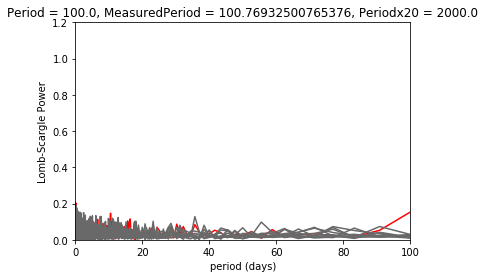

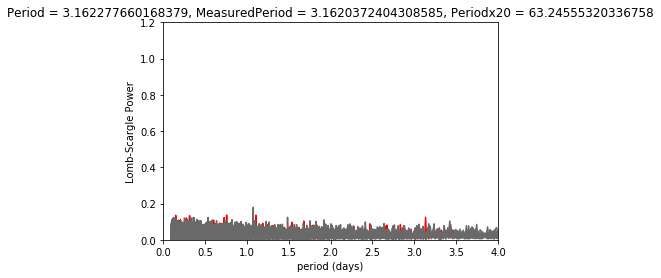

Finding optimal frequency:
 - Estimated peak width = 0.00183
 - Using 5 steps per peak; omega_step = 0.000365
 - User-specified period range:  0.0029 to 0.012
 - Computing periods at 4499829 steps


MemoryError: 

In [16]:
results = []
fullmeasuredPeriod = []
fullPeriod = []
fullPower = []
fullSigLevel = []
fullMag = []
MagRangearray = np.linspace(17,24,maglength)
MagRange = [x for x in MagRangearray]
maglist = []
for x in range(len(MagRange)):
    maglist.append([MagRange[x]]*7)

ktype = [0,7.453200000000001,4.48,2.924,1.2134736842105265,-0.06871578947368412,0.5312842105263158]
Av = [0,4.145,3.237,2.273,1.684,1.323,1.088]

newlist = [[]]*len(maglist)
firstnewlist = [[]]*len(maglist)
for x in range(len(maglist)):
    firstnewlist[x] = map(add,maglist[x],ktype)
    newlist[x] = map(add,firstnewlist[x],Av)
    newlist[x] = [y - (ktype[3] + Av[3]) for y in newlist[x]] 
    
pool = Pool(processors)
for h in range(len(newlist)):
    print(newlist[h])
    results.append(pool.map(partial(lombScargle, objectmag=newlist[h]),FrangeLoop))
    
    twoDlist = [[],[],[],[],[],[]]
    for X in range(len(results)):
        for Y in range(len(results[X])):
            twoDlist[0].append(results[X][Y][0])
            twoDlist[1].append(results[X][Y][1])
            twoDlist[2].append(results[X][Y][2])
            twoDlist[3].append(results[X][Y][3])
            twoDlist[4].append(results[X][Y][4])
            twoDlist[5].append(results[X][Y][5])
    with open('inminionfullresultsFile.txt', 'r') as istr:
        with open('outminionfullresultsFile.txt','w') as ostr:
            for i, line in enumerate(istr):
                # Get rid of the trailing newline (if any).
                line = line.rstrip('\n')
                if i % 2 != 0 and ((i-1)/2) <= len(twoDlist):
                    line += str(twoDlist[(i-1)/2])+','
                ostr.write(line+'\n')
            
    

